# Sampling and Monte Carlo integration

Uniform random number generators can be used to sample other probability models.
This worksheet will cover two techniques to transform a uniform random variate to a desired probability distribution:   the inverse CDF and the accept/reject method.

Random variates, uniform or not, are also a critical element of Monte Carlo (MC) integration techniques.  This worksheet will also cover this topic.

Excellent background and practical material can be in the following references:
* Devroye, Luc 1986 Non-Uniform Random Variate Generation [https://numerical.recipes/devroye/]
* Gentle, James 2003 Random Number Generation and Monte Carlo Methods
* Lepage, G.P. 1978, A New Algorithm for Adaptive Multidimensional Integration, Journal of Computational Physics, vol. 27, pp. 192-203
* Lepage, G.P. 1980, VEGAS: An Adaptive Multidimensional Integration Program, Publication CLNS-80/447, Cornell University
* Numerical Recipes Software 2007, [Complete VEGAS Code Listing](http://numerical.recipes/webnotes?9), Numerical Recipes Webnote No. 9
* Press, W.H., and Farrar, G.R. 1990, Recursive Stratified Sampling for Multidimensional Monte Carlo Integration, Computers in Physics, vol. 4, pp. 190-195

## Requirements

We import both `numpy` and `scipy`.  Both have random number engines and integration routines. 

In [6]:
import numpy as np
import scipy as sp

## Sampling:  inverse CDF method

The CDF (or cumulative distribution function) is an integral (sum) over a continuous (discrete) probability distribution function.  For this worksheet, we consider continuous distributions.  We believe that all you need to know about discrete distributions can be inferred from your knowledge of continuous ones.

The CDF has some nice properties.   First, it ranges from 0 to 1 -- the same range as our uniform random variates.   Second, it always increases from left to right.

Consider a properly normalized probability distribution $p(x)$ with CDF $P(x)$ and inverse
$P^{-1}(x)$.
The iCDF method is to solve the equation $$u = P(x)$$ or $$x = P^{-1}(u)$$ for uniform random variate $u$.
This works because:

prob($P^{-1}(u) \le x$) = prob($u \le P(x)$) = $P(x)$ and

prob($P(x) \le u$) = prob($x \le P^{-1}(u)$) = $P( P^{-1}(u) )$ = $u$.

In practice, this method is useful only for a subset of interesting probability distributions.
In other cases, one might need to solve $u = P(x)$ using numerical methods.

Here is a selection of some probability distributions that can be sampled using the iCDF method:

## Some useful probability distributions evaluated using iCDF method

| Name | Range | Density $f(x)$ | $F(X)$ | $X=F^{-1}(U)$ |
| --- |  --- |  --- | --- | --- |
| Exponential | $x\ge 0$ | $\lambda \exp(-\lambda x)$ | $1-\exp(-\lambda x)$ | $-\frac{1}{\lambda}\ln U$ |
| Cauchy | $-\infty < x < \infty$ | $\displaystyle\frac{\sigma}{\pi(x^2+\sigma^2)}$ | $\displaystyle\frac{1}{2}+\frac{1}{\pi}\arctan(\frac{x}{\sigma})$ | $\sigma \tan(\pi U)$ |
| Triangular | $0\le x\le a$ | $\displaystyle \frac{2}{a}(1-\frac{x}{a})$ | $\displaystyle \frac{2}{a}(x-\frac{x^2}{2a})$ |  $a(1-\sqrt{U})$ |

Note, use has been made of the fact that, if $U$ is a uniform random variate distribution on $(0,1)$, then so is $1-U$.

Exercise:  derive a sampling method for the Pareto(a,b) distribution $$\displaystyle a b^a \over x^{a+1}$$ over the range $x\ge b\gt 0$.

## Sampling:  Accept/Reject

The iCDF method uses one random variate to generate another.   If we are willing to give up on this simple relation, we will find that we have much more flexibility to sample probability distributions.   To sample from a probability distribution $f(x)$, what is needed is a uniform random variate $u$ and a generator of another probability distribution $g(x)$ such that $f(x) < c g(x)$, where c is a constant.   $g(x)$ could be generated using any method, such as the iCDF method above.   The only challenge is to find a good function $g(x)$, which comes down to knowing something about $\sup_x f(x)$.   Assume you know the actual maximum of $f(x) \equiv f^*$.    Then, a simple (but possibly inefficient) algorithm is to select one uniform random variate to sample $x = x_\min + (x_\max - x_\min) u_1$, then accept if $\displaystyle u_2 < \frac{f(x)}{f^*}$.   

There are proofs of the basic accept/reject algorithm, but a convincing alternative is to draw a cartoon of the process and contemplate what is happening.   The algorithm samples uniformly over $(x,f(x))$ and uses the fact that the area under the curve is the integral of the function.
It is ana

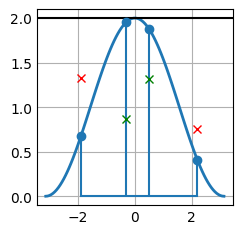

In [34]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(-np.pi, np.pi, 100)
y = 1 + np.cos(x)

xp = np.array([-1.9,-0.3,0.5,2.2])
yp = 1. + np.cos(xp)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)
ax.axhline(y=2,color="black")
ax.stem(xp,yp)
ax.plot(xp[0],1.33,'x',color="red")
ax.plot(xp[1],0.87,'x',color="green")
ax.plot(xp[2],1.32,'x',color="green")
ax.plot(xp[3],0.75,'x',color="red")

plt.show()